In [ ]:
# The original function for creating checkerboard does not work for board dimension is an even number.
# This notebook is to fix this bug. 

In [37]:
import ncams
import os
import time
import numpy as np
import cv2
from glob import glob
from PIL import Image
import matplotlib.pyplot as mpl_pp


In [3]:
BASE_DIR = r'C:\Users\Yiting\YitingData\Hand_tracking'
session_dir = r'checkerboard_example'
config_dir = os.path.join(BASE_DIR, session_dir)

In [29]:
ncams_config = {
    # Camera information
    'serials': [19472072, 19472089], #
    'reference_camera_serial': 19472072,  # This is linked to how the cameras are hardwired
    'image_size': (1200, 1920),  # height x width 
    # Board information
    'board_type': 'checkerboard',  # charuco (preferred) or checkerboard
    'board_dim': [6, 8],  # If this is incorrect it will cause analyses to freeze
    'check_size': 20, # Size of the checks in mm, essential for accurate 3D reconstructions
    'world_units': 'mm', # Determines how to scale the world ('m', 'dm', 'cm', 'mm')
    # Path information
    'setup_path': config_dir, # Where to store this configuration
    'setup_filename': 'ncams_config.yaml', # Desired filename for the configuration
    'intrinsic_path': 'intrinsic', # Name of the subdirectory for the intrinsic calibration data
    'intrinsic_filename': 'intrinsic_calib.pickle', # Desired filename for the intrinsics
    'extrinsic_path': 'extrinsic', # Name of the subdirectory for the extrinsic calibration data
    'extrinsic_filename': 'extrinsic_calib.pickle'}

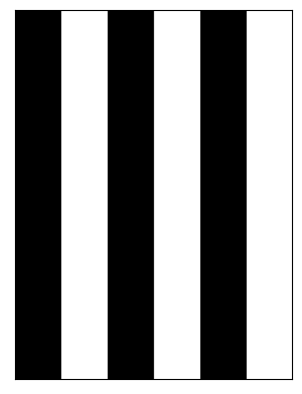

In [30]:
ncams.camera_io.config_to_yaml(ncams_config)
checker_dict, checker_board, board_img = ncams.camera_tools.create_board(ncams_config, output=True, plotting=True)


In [49]:
board_type= 'checkerboard'
board_dim= [6, 8]
check_size = 20
dpi = 300
dpmm = dpi / 25.4 # Convert inches to mm

# Litearlly just tile black and white squares
check_length_in_pixels = int(np.round(check_size * dpmm))
black_check = np.ones((check_length_in_pixels, check_length_in_pixels)) * 255
white_check = np.zeros((check_length_in_pixels, check_length_in_pixels))
board_img = np.empty((0, check_length_in_pixels*board_dim[0]), int)

for _ in range(board_dim[1]):
    col = np.empty((check_length_in_pixels, 0), int)
    if (_ % 2) == 0: # even row
        white = True
    else: # odd row
        white = False
    for __ in range(board_dim[0]):
        if white:
            col = np.append(col, white_check, axis=1)
        else:
            col = np.append(col, black_check, axis=1)
        white = not white

    board_img = np.append(board_img, col, axis=0)

[]

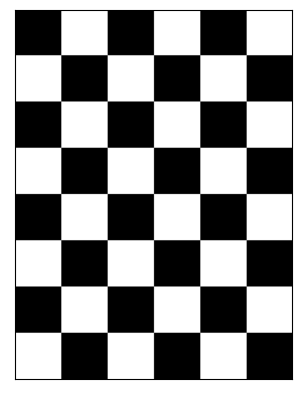

In [50]:
ax = mpl_pp.subplots()[1]
ax.imshow(board_img/255, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

In [52]:
cv2.imwrite(os.path.join(config_dir, board_type+'_board.'+'png'), board_img)

True